## 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!  
### 손실함수 정의와 기울기 계산의 구현  

1-(1) 데이터 가져오기  
sklearn에서 load_diabetes()로 데이터를 가져온 다음 diabets객체에 어떤 요소들이 존재하는지 dir(diabets)로 파악, DESCR을 통해 데이터 전체 구성 파악

In [1]:
from sklearn.datasets import load_diabetes

diabets=load_diabetes()
print(dir(diabets))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [2]:
print(diabets.DESCR) #기본 정보 확인

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

1-(2) 모델에 입력할 데이터 X 준비하기  
1-(3) 모델에 예측할 데이터 y 준비하기  
DESCR을 통해 442개의 instance, 10개의 attribute가 존재함을 확인, data와 target이 feature와 label역할을 하는 것으로 확인하였다.
또한, 성별은 범주형 데이터로 사용이 불가하지만, DESCR에서 이미 스케일링이 이루어진 것으로 확인하였기 때문에 추가 가공(one-hot-encoding 등)은 하지 않았다.

In [3]:
print(diabets.data.shape)
print(diabets.target.shape)

(442, 10)
(442,)


In [4]:
df_X=diabets.data
df_y=diabets.target

In [5]:
import numpy as np
diabets_data=np.array(df_X)
diabets_target=np.array(df_y)

1-(4) train 데이터와 test 데이터로 분리하기  
train_test_split일 이용하였으며, train과 test용 데이터 비율은 7:3으로 정하였다.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(diabets_data, diabets_target, test_size=0.3, random_state=7)

1-(5) 모델 준비하기  
가중치 W와 편향 b에 대해 무작위 값을 입력하고 모델을 준비하였다. 총 10개의 attribute가 존재하기 때문에 0 열부터 9열까지 총 10번의 루프를 돌려가며 각 변수(x0, x1, x2, ..., x9)에 맞는 가중치 W(w0, w1, w2, ..., w9)를 곱한 값을 각각 더한 다음 편향 b를 마지막으로 더한 다음 그 값을 출력하였다. 행렬 연산임에도 코드가 복잡하지 않은 이유는 numpy의 broadcasting이 작동하였기 때문이며, 이렇게 값을 더한 prediction의 shape은 입력한 attribute크기가 된다.

In [7]:
W= np.random.rand(10)
b= np.random.rand()

def model(X, W, b):
    predictions= 0
    for i in range(10):
        predictions+= X[:, i]*W[i]
    predictions+= b
    return predictions

1-(6) 손실함수 loss정의하기  
손실함수의 경우 MSE를 사용하기 때문에 이를 구할 수 있는 MSE 함수를 추가하였으며, 손실함수 loss에서 model을 통해 예측 값을 구한 다음 바로 손실 score를 구할 수 있도록 하였다.

In [8]:
def MSE(a, b):
    mse= ((a-b)**2).mean()
    return mse

def loss(X_train, W, b, y_train):
    predictions = model(X_train, W, b)
    L = MSE(predictions, y_train)
    return L

1-(7) 기울기를 구하는 gradient 함수 구현하기  
gradient 함수의 경우에도 model을 사용하여 예측값 y_pred를 구하며, 가중치 w와 매개변수 b값에 대한 미분을 통해 학습에 적용할 dW와 db값을 구한다.

In [9]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

1-(8) 하이퍼 파라미터인 학습률 설정하기  
학습률은 임의의 값 0.5를 선택하였다. 이는 무조건적으로 결정한 것은 아니고 이보다 작은 수(0.001, 0.1) 등을 몇번 설정해 보았는데, 지나치게 loop수가 커야 하는 것 같았고, 1을 대입했을 때는 오히려 loss값이 커지는 것을 확인하였기 때문에 몇번의 시도 끝에 0.5로 맞추었다.

In [10]:
LEARNING_RATE = 0.5

1-(9) 모델 학습하기  
먼저 gradient()를 통해 학습을 적용할 값을 구하여 가중치 W와 편향 b값을 갱신한 뒤 손실함수 loss 값을 계산하는 것을 반복한다. 10번 loop가 돌 때마다 손실함수의 loss 값이 출력된다. losses변수의 경우 매회차의 loss값을 저장하며, loss 감소 추세를 확인하는데 사용한다.

In [11]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 50 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 50 : Loss 2956.8114
Iteration 100 : Loss 2948.8763
Iteration 150 : Loss 2945.4494
Iteration 200 : Loss 2942.8851
Iteration 250 : Loss 2940.8294
Iteration 300 : Loss 2939.1038
Iteration 350 : Loss 2937.6024
Iteration 400 : Loss 2936.2604
Iteration 450 : Loss 2935.0384
Iteration 500 : Loss 2933.9112
Iteration 550 : Loss 2932.8628
Iteration 600 : Loss 2931.8823
Iteration 650 : Loss 2930.9622
Iteration 700 : Loss 2930.0969
Iteration 750 : Loss 2929.2819
Iteration 800 : Loss 2928.5136
Iteration 850 : Loss 2927.7890
Iteration 900 : Loss 2927.1053
Iteration 950 : Loss 2926.4601
Iteration 1000 : Loss 2925.8512
Iteration 1050 : Loss 2925.2764
Iteration 1100 : Loss 2924.7338
Iteration 1150 : Loss 2924.2215
Iteration 1200 : Loss 2923.7380
Iteration 1250 : Loss 2923.2815
Iteration 1300 : Loss 2922.8505
Iteration 1350 : Loss 2922.4437
Iteration 1400 : Loss 2922.0596
Iteration 1450 : Loss 2921.6970
Iteration 1500 : Loss 2921.3547
Iteration 1550 : Loss 2921.0315
Iteration 1600 : Loss 2920.7

손실값 loss의 추세는 다음과 같다.

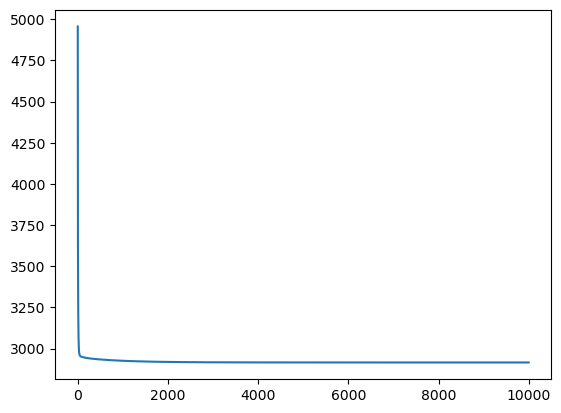

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

1-(10) test 데이터에 대한 성능 확인하기  

In [13]:
mse=loss(X_test, W, b, y_test)
mse

2785.807309727749

1-(11) 정답 데이터와 예측한 데이터 시각화하기  
정답 데이터와 예측값을 넣고 데이터를 시각화해 보았다.  
푸른 점은 test용 x데이터 중 첫번째 column과 test용 y데이터를 대응시킨 점이고  
주황 점은 test용 x데이터 중 첫번째 column과 model의 prediction 값을 대응시켰다  
그 결과 시각적으로 보았을 때 낮은 수준의 연관성을 느낄 수 있었다.

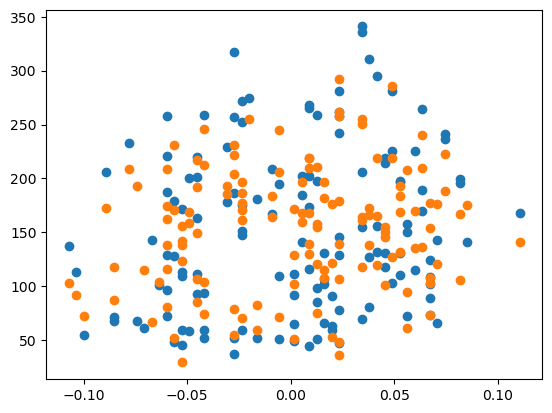

In [14]:
prediction= model(X_test, W, b)
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 프로젝트 2: 날씨 좋은 월요일 오후 세시, 자전거 타는 사람은 몇 명?  
### 선형회귀 모델을 통한 실전(캐글 출처의) 데이터 분석  

2-(1) 데이터 가져오기  
데이터셋 링크: https://www.kaggle.com/c/bike-sharing-demand/data  

In [15]:
import pandas as pd
# pandas가 훨씬 편하지만, 과제 목적상 numpy 연산을 요구하는 것처럼 보여 pd로 받고, 변환시킴
pd_bicycle_data=pd.read_csv('.\\ess_data\\bicycle_train.csv') 
np_bicycle_data=pd_bicycle_data.to_numpy()

2-(2) datetime 컬럼은 datetime 자료형으로 변환하고 연, 월, 시, 분 초까지 6가지 컬럼 생성하기  
힌트: to_datetime 활용 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime  
pandas datetime extract year month day 키워드로 검색해 보기  
  
to_datetime은 예외적인 경우에만 datetime 형을 출력하고, 일반적으로는 timestamp형태로 값을 출력하기 때문에 timestamp를 사용하였다. 또한, 이 데이터는 매 시간 측정된 데이터이므로 지시에 나와있지 않은 일(day)를 추가하고 불필요한 분, 초는 column에 추가하지 않았으며, 다만 주석으로 남긴다.

In [16]:
# datetime의 str type을 timestamp로 바꿈, 
# type()으로 확인시 timestamp로 확인되나, info()로 확인시 datetime으로 나옴
#중요하지 않으므로 이에 대한 확인은 하지 않음
pd_bicycle_data['datetime']=pd_bicycle_data['datetime'].apply(pd.to_datetime)

# datetime column을 연, 월, 일, 시간으로
pd_bicycle_data['year']=pd.DatetimeIndex(pd_bicycle_data['datetime']).year
pd_bicycle_data['month']=pd.DatetimeIndex(pd_bicycle_data['datetime']).month
pd_bicycle_data['day']=pd.DatetimeIndex(pd_bicycle_data['datetime']).day
pd_bicycle_data['hour']=pd.DatetimeIndex(pd_bicycle_data['datetime']).hour
# 분,초는 구할 수 있으나 이 data는 시간 단위로 측정되었기 때문에
# 구하는 것은 불필요하다.
# pd_bicycle_data['minute']=pd.DatetimeIndex(pd_bicycle_data['datetime']).minute
# pd_bicycle_data['second']=pd.DatetimeIndex(pd_bicycle_data['datetime']).second

# column이 잘 형성되었는지 .info()로 확인
pd_bicycle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

2-(3) year, month, day, hour, minute, second 데이터 개수 시각화하기  
subplot을 활용해서 한 번에 4개의 그래프 함께 시각화(second와, minute는 고려 대상에서 제외되었기 때문에 나머지 4개의 그래프만 지원한다.  
하지만, 이러한 데이터의 개수가 무슨 의미를 가지고 있는지 잘 모르겠다. 어떻든 해당 column들은 각각의 datetime에서 분리되었기 때문에 datetime과 같은 수의 데이터를 가지고 있음이 자명하며, 이미 info()를 통해 몇개의 데이터가 존재하는지도 대략적으로 확인할 수 있었기 때문이다.
그래서 혹시 각 column안에 데이터 종류가 얼마나 되는지 물어보았나 싶어 아래와 같이 작성해 보았다.(한편으로는 단순히 column안의 데이터 개수를 세는 것은 너무 단조로워 보였기 때문이기도 하다.)

<AxesSubplot:xlabel='hour', ylabel='count'>

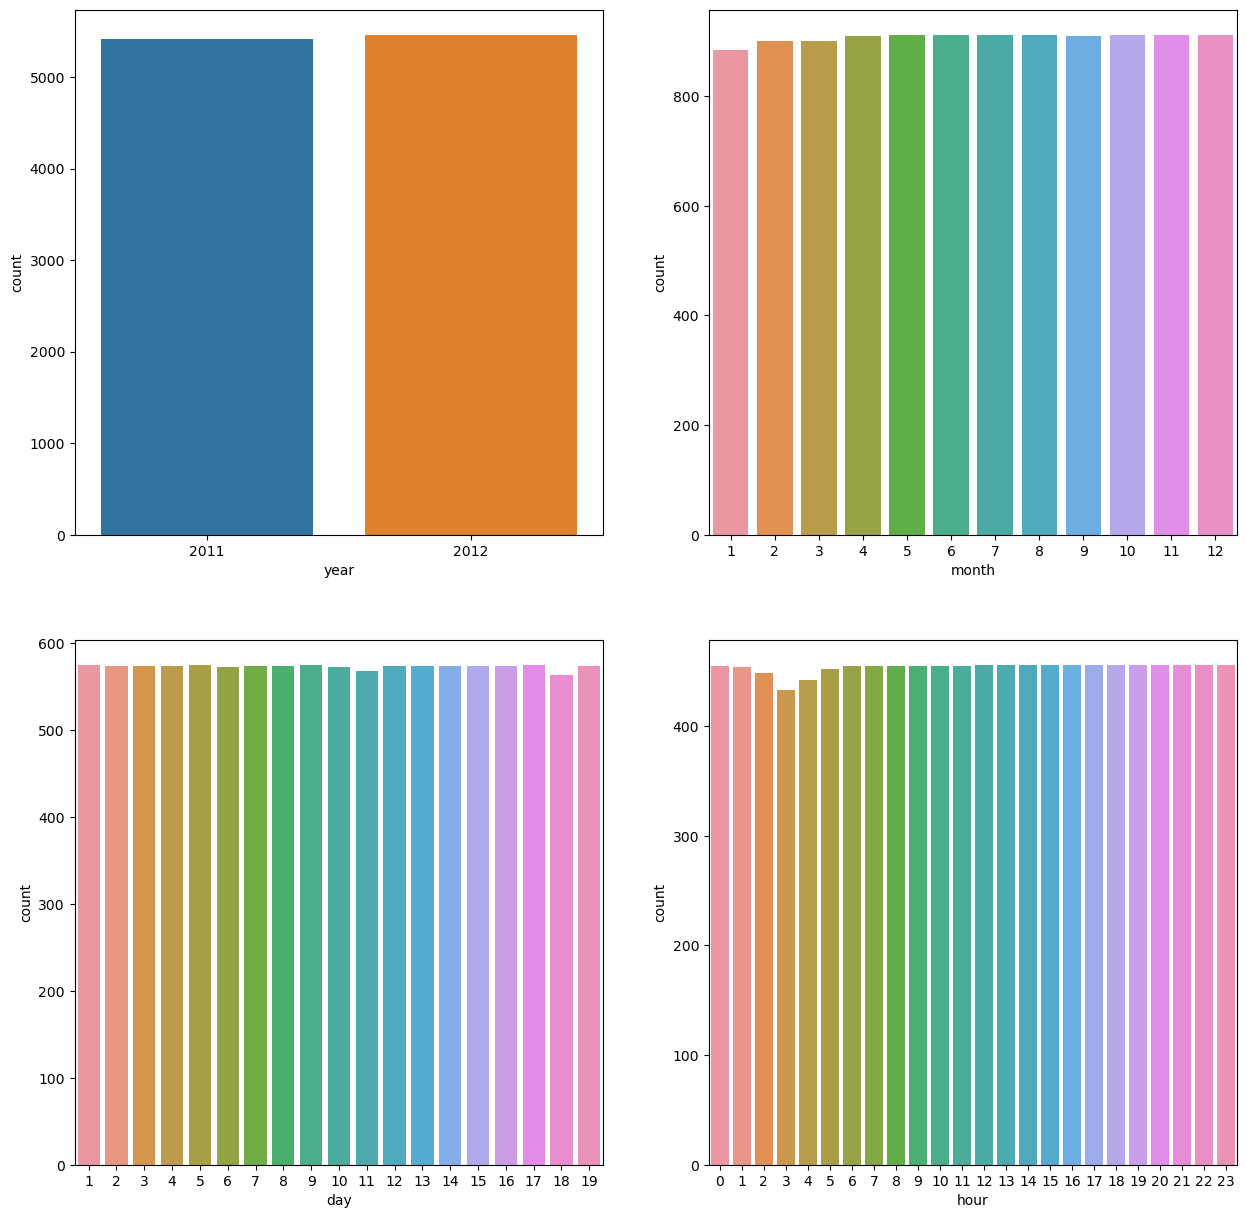

In [17]:
import seaborn as sns
fig, ax= plt.subplots(ncols=2, nrows=2, figsize=(15,15))
sns.countplot(x=pd_bicycle_data['year'], ax=ax[0][0])
sns.countplot(x=pd_bicycle_data['month'], ax=ax[0][1])
sns.countplot(x=pd_bicycle_data['day'], ax=ax[1][0])
sns.countplot(x=pd_bicycle_data['hour'], ax=ax[1][1])

2-(4) X, y컬럼 선택 및 train/test 데이터 분리  
  
X칼럼을 선택하는데는 두 가지 방법을 사용하였다.
상관계수: count와 다른 feature의 상관계수를 확인하여 0.1 이상인 값을 1차적으로 걸러낸다.  
휴리스틱: 상관계수는 기준 이상이나, 포함되지 않을 법한 feature들을 2차로 걸러낸다.  

상관계수 시행  
시행 결과, season, weather, temp, atemp, humidity, windspeed, casual, registered, year, month, hour가 2차 휴리스틱으로 넘어가게 되었다.

In [18]:
pd_bicycle_data.corr().loc[['count']]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.0,0.260403,0.166862,0.019826,0.400601


휴리스틱  
휴리스틱에서는 season, weather, temp, atemp, humidity, windspeed, casual, registered, year, month, 
hour 중 불필요하거나 다른 feature에 포함되어 있다고 생각하는 feature들을 배제하였다. 특히, 자전거의 대여는 기상적 요인의 영향이 막대할 것으로 예상하기 때문에 이를 고려하였다.
  
배제한 feature는 다음과 같다.  
season: 계절적 요인은 이미 temp, atemp, humidity, weather등 기상적 요인에 반영된 것으로 보아 배제하였다.  
casual, registered: 이 둘은 상관계수가 매우 높지만, 이는 count와 인과관계가 존재하기 때문이 아니라 count를 구성하는 요소이기 때문에 높은 것(casual + registered = count)이므로 배제한다.  
year, month: 상관계수가 기준을 넘었지만, 두 값은 범주형 데이터이기 때문에 상관계수 기준이 큰 의미가 없으며, . year의 증감이 자전거 대여수 증감에 영향을 미칠 것으로 보이지도 않기 때문에 제거한다. month는 자전거 대여에 영향을 미칠 수 있지만. 이는 계절적 요인으로 인한 영향일 것이라 보기 때문에 season과 같은 이유로 배제된다.  
  
또한 weather와, hour은 범주변수에 가깝지만 밀접한 관계가 존재할 것으로 믿어졌기 때문에 배제하지 않았다.
결국 weather, temp, atemp, humidity, windspeed, hour가 선정되었다.  
마지막으로 data(x), label(y)값을 적용하는 동시에 hour와 weather값을 one-hot-encoding하였다.

In [19]:
bicycle_label=pd_bicycle_data['count']
bicycle_data=pd_bicycle_data[['holiday', 'workingday', 'weather', 'temp', 'atemp', \
                              'humidity', 'windspeed', 'hour']]
# one-hot-encoding
bicycle_data=pd.get_dummies(bicycle_data, columns=['hour', 'weather'])

train-test 데이터 분리

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(bicycle_data, bicycle_label, test_size=0.3, random_state=10)

2-(5) LinearRegression 모델 학습  
scikit-learn에서 LinearRegression 모델을 학습한다.

In [21]:
from sklearn.linear_model import LinearRegression

linear_regression=LinearRegression()
linear_regression.fit(X_train, y_train)
print('학습 완료')

학습 완료


2-(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산  

In [22]:
# X_test입력하여 예측값 출력
y_pred= linear_regression.predict(X_test)

# y_pred(예측값), y_test(test label)간의 손실함수 정의 및 계산
def MSE(a, b):
    mse= ((a-b)**2).mean()
    return mse
def RMSE(a, b):
    return MSE(a,b)**(1/2)

L_MSE=MSE(y_pred, y_test)
L_RMSE=RMSE(y_pred, y_test)

print(L_MSE, L_RMSE)

13388.12270215327 115.70705554180034


2-(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기  

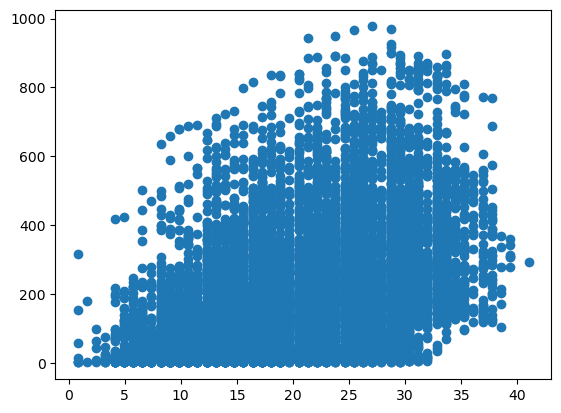

In [23]:
plt.scatter(bicycle_data['temp'], bicycle_label)
plt.show()

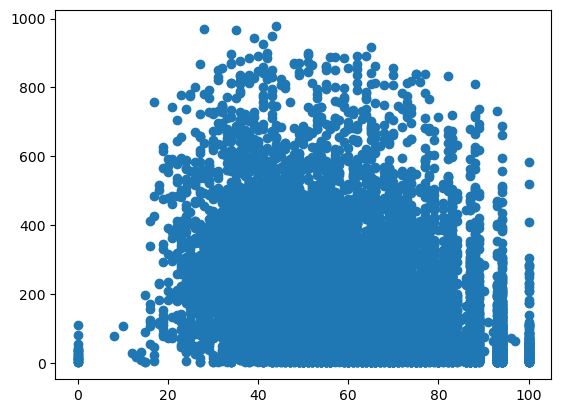

In [24]:
plt.scatter(bicycle_data['humidity'], bicycle_label)
plt.show()

루브릭
1. 프로젝트 1의 회귀모델 예측정확도가 기준이상 높게 나왔는가? (MSE 손실함수값 3000이하 달성)  
프로젝트 1의 회귀모델 예측정확도는 train set 기준 2915.5778, test set 기준 2785.8073가 나왔다. 문제는 이러한 점수가 random seed에 의해 요동친다는 것이다. 처음 코드를 실행했을 때, 학습률은 적당한 선에서 지정하면 발산하지 않는 이상 학습이 거듭될수록 loss가 수렴하였으며 loop값은 적절한 학습률만 지정하면 큰 문제가 되지 않는 수준이었다. loss 점수도 2800대로 양호한 편이었지만, 이를 test set에 적용하였을 때는 3300이라는 처참한 점수가 나온 것이다. 해당 과제에서 조작할 수 없는 변수가 몇 없었기에 다른 사람들의 조언을 듣고 몇 번의 random seed 수정 끝에 겨우 점수를 맞출 수 있었다. 이는 모델에 문제가 있다고 할 수 있으며, 모델의 가장 큰 문제는 데이터가 적기 때문인 것으로 보인다. 데이터가 적으니 학습이 제대로 이루어지기 힘들고, 학습이 이루어지기 힘드니 loss점수가 제멋대로인 것이다. 이를 통해 충분한 양질의 data를 구하는 것이 분석에 있어 매우 중요함을 깨달을 수 있었다.

2. 프로젝트 2의 회귀모델 예측정확도가 기준이상 높게 나왔는가? (RMSE 값 150이하 달성)  
프로젝트 2의 회귀모델 정확도는 MSE 13388.1227 RMSE 115.7070 로 만족스러운 편이었다. 프로젝트 1의 loss점수에 비한다면 MSE값이 작다고 할 수 없겠지만, 1의 프로젝트는 이미 표준화 스케일링을 마쳤기 때문에 프로젝트 2의 feature들에 비해 작은 값이라는 점을 고려한다면 무작정 나쁘다 할 수 없는 수준이었으며, RMSE 같은 경우 150이하인데 115대의 값이 나온 것은 나름 좋은 성과가 나온 것이라고 볼 수 있다. 이러한 요인으로는 모델에 학습시킬 데이터셋을 잘 선별하고, 범주형 변수들의 one-hot encoding이 제대로 이루어진 채 학습이 진행되었기 때문이라고 조심스럽게 추측해본다.


3. 시각화 요구사항이 정확하게 이루어졌는가? (각 프로젝트 진행과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.)  
데이터 시각화를 모두 진행하기는 했지만 다소 아쉬움이 남는다. 프로젝트 1의 loss값 그래프 같은 경우에는 만족스러운 형상이 나왔지만, 프로젝트 2-(3)의 다양한 데이터 시각화는 너무 단순했고, 2-(7) 시각화는 기대하던 형상이 나오지 않았기 때문이다. temp와 humidity 둘 다 상관계수가 높게 측정되었으며, 휴리스틱 관점에서도 충분한 인과관계를 가지고 있다고 생각했기 때문에  충분한 형상을 갖춘 선형의 값이 나올 것이라 예상하였으나 그렇지 않았다. 이것이 잘못 시각화를 한 것인지 원래 그렇게 나오는 것인지 모를 정도로 말이다. 시간이 된다면 시각화에 좀 더 신경을 쓰는 편이 좋을 것 같다.

Ref.  
lms노드(https://lms.aiffel.io/)  
pandas api(https://pandas.pydata.org/docs/reference/index.html)
numpy api(https://numpy.org/doc/stable/reference/)
matplotlib api(https://matplotlib.org/stable/api/index.html)
seaborn api(https://seaborn.pydata.org/api.html)